# Chapter 3: Adding Layers

- we have built a respectable neural network thus far, but we only have one layer
- neural networks become "deep" when we have 2 or more **hidden layers**
---
- a hidden layer is one that isn't an input or an output
- you, as the scientist, see data as it is processed through the input layer and the resulting data from the output layer 
- layers between these endpoints have values that we don't necessarily deal with, hence the name "hidden"
- however, as the scientists, we will often use the values in these layers to diagnose issues or improve our neural networks

In [2]:
import numpy as np

inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]] 
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5] 
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5] 

In [3]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + np.array(biases)
layer1_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

- as previously stated, inputs to layers are either direct inputs from the actual dataset or inputs from previous layers
- that's why we defined 2 versions of *weights* and *biases*, but only 1 version of *inputs*
- the inputs for layer 2 will be the outputs of layer 1

In [4]:
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + np.array(biases2)
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

### Creating Training Data
- instead of manually hand-typing random data, let's create a quick function that will generate some non-linear data
- *linear* data is data that can be fit/represented with a straight line, whereas non-linear data cannot

In [6]:
np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.05
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

- don't worry too much about understanding the function above as it's just here to generate some non-linear data for us to play with
- `np.random.seed(0)` is set to produce repeatable results 
- note that **X** and **y** do not correspond to x and y coordinates
- X and y are both standard Machine Learning syntax where X is an array of samples and Y is an array of labels
- in this case, X is an array comprised of (x, y) coordinate pairs, and y is an array of which spiral arm each coordinate pair falls on
---
- this function allows us create a dataset with as many classes as we want
- this function has parameters to choose the number of classes and the number of points/observations per class in the resulting non-linear dataset

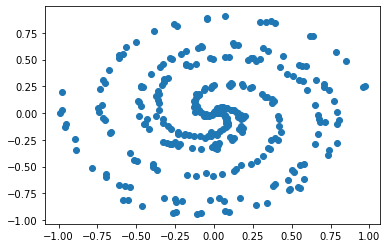

In [7]:
import matplotlib.pyplot as plt

X, y = create_data(100, 3)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [8]:
X[:10]

array([[0.        , 0.        ],
       [0.00151976, 0.00998603],
       [0.00643848, 0.01914857],
       [0.01668634, 0.02529505],
       [0.02404753, 0.03246849],
       [0.01886886, 0.0468479 ],
       [0.04018194, 0.04537077],
       [0.04490678, 0.05461567],
       [0.05769605, 0.05657837],
       [0.07449363, 0.05210722]])

In [9]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

- if you trace from the center, you can clearly determine all 3 separately, but this is a very challenging problem for a machine learning classifier to solve
- adding color to the chart makes things more clear

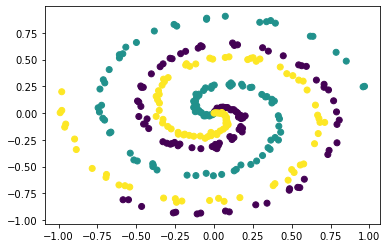

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Dense Layer Class
- now that we no longer have to hand-type our data, let's create something similar for our various types of neural network layers
- so far, we've only used a **dense** or **fully-connected** layer
- these layers are most commonly referred to as "dense" layers in papers, literature, and code, but are occasionally called "fc" (fully-connected) for short
- our dense layer class will begin with two methods:

In [11]:
class Layer_Dense:

    def __init__(self, inputs, neurons):
        # Initialize weights and biases
        pass  # using pass statement as a placeholder

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        pass  # using pass statement as a placeholder

- as previously stated, weights are oftentimes initialized randomly for a model, but if you wish to load a pre-trained model, you should initialize the parameters to mirror those of the finished pre-trained model
- for now, however, we'll stick with random initialization
---
- next, we have the *forward* method
- when we pass data through a model from beginning to end, we call this a **forward pass**
- just like everything else, this is not the only approach as you can have data loop back around and do other interesting things
- for now, however, among other things, we'll keep it simple and perform a regular forward pass

### Initialization Method

In [12]:
class Layer_Dense:

    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros(shape=(1, neurons))
        
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        pass  # using pass statement as a placeholder

- in our random initialization code, we are setting the weights to be random and the biases to be 0
- note that we're initializing weights to be `(inputs, neurons)` rather than `(neurons, inputs)`
- we are doing this instead of a transpose every time we perform a forward pass
---
- a bias can ensure a neuron fires initially, so it may be appropriate to initialize the biases to some non-zero number
- the most common initialization for biases is 0
- this is something that will vary depending on your use-case and is just one of many things you can try to tweak to improve results
---
- next, let's explore `np.random.randn()` and `np.zeros()` in further detail, which are convenient methods for initializing arrays
- in general, neural networks work best with values between -1 and +1
- conveniently, `np.random.randn()` produces a Gaussian distribution with a mean of 0 and variance of 1, so all we have to do is then multiply this Gaussian distribution for the weights by 0.01
---
- finally, `np.random.randn()` takes dimension sizes as parameters
- so the weights here will be the number of inputs for the first dimension and the number of neurons for the second dimension

In [62]:
np.random.randn(2, 5) 

array([[ 0.16392857,  0.09632136,  0.94246812, -0.26759475, -0.67802578],
       [ 1.29784579, -2.36417382,  0.02033418, -1.34792542, -0.76157339]])

- the cell above has returned a 2x5 array with data randomly sampled from a Gaussian distribution with a mean of 0 and variance of 1
---
- next, `np.zeros()` takes a desired array shape as an argument and returns an array of that shape containing zeros

In [66]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

---
- here is an example of how our initialization method initializes weights and biases:

In [74]:
inputs = 2
neurons = 4

weights = 0.01 * np.random.randn(inputs, neurons)
biases = np.zeros((1, neurons))

print(weights)
print(biases)

[[-0.00219541 -0.01084037  0.0035178   0.00379236]
 [-0.00470033 -0.00216731 -0.00930157 -0.00178589]]
[[0. 0. 0. 0.]]


### Dead Neurons
- its possible for `weights * input + biases` to not meet the **threshold** of a step function, which means that the neuron will output a 0 
- this output of 0 will be another neuron's input
- any weight multipled by 0 is going to be 0, so it's possible that all neurons simply do not fire, which essentially renders the network "dead"

### Forward Method
- next, we'll take a look at our forward method:

In [0]:
class Layer_Dense:

    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

- we are now ready to make use of this class, so let's generate some data and start using our layers

In [76]:
# Create dataset with 3 classes, each with 100 points
X, y = create_data(100, 3)

# Create Dense layer with 2 input features and 3 output values (3 neurons)
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs (each sample has 2 features), 3 outputs

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Let's see the output for the first few samples:
print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.52959542e-06 -9.55589707e-05  1.87622350e-04]
 [ 1.35429114e-05 -1.83040758e-04  3.73157328e-04]
 [-9.01985458e-05 -3.11596010e-04  5.58420707e-04]
 [-5.87642326e-05 -3.97698618e-04  7.50954474e-04]]


- alright, we have a network of neurons, so our neural network model is almost deserving of its name, but we're still missing the activation functions